In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [2]:
dataframe = pd.read_csv('dataset.csv')

In [3]:
dataframe.head()

,Unnamed: 0,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
dataframe.isna().sum()

Unnamed: 0                    0
CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [5]:
dataframe.describe()

,Unnamed: 0,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,0.000000,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,24999.750000,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,49999.500000,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,74999.250000,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,99999.000000,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


C:\Users\tejas\AppData\Local\Temp\ipykernel_22312\4223427914.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataframe.drop('Unnamed: 0',axis=1).corr()


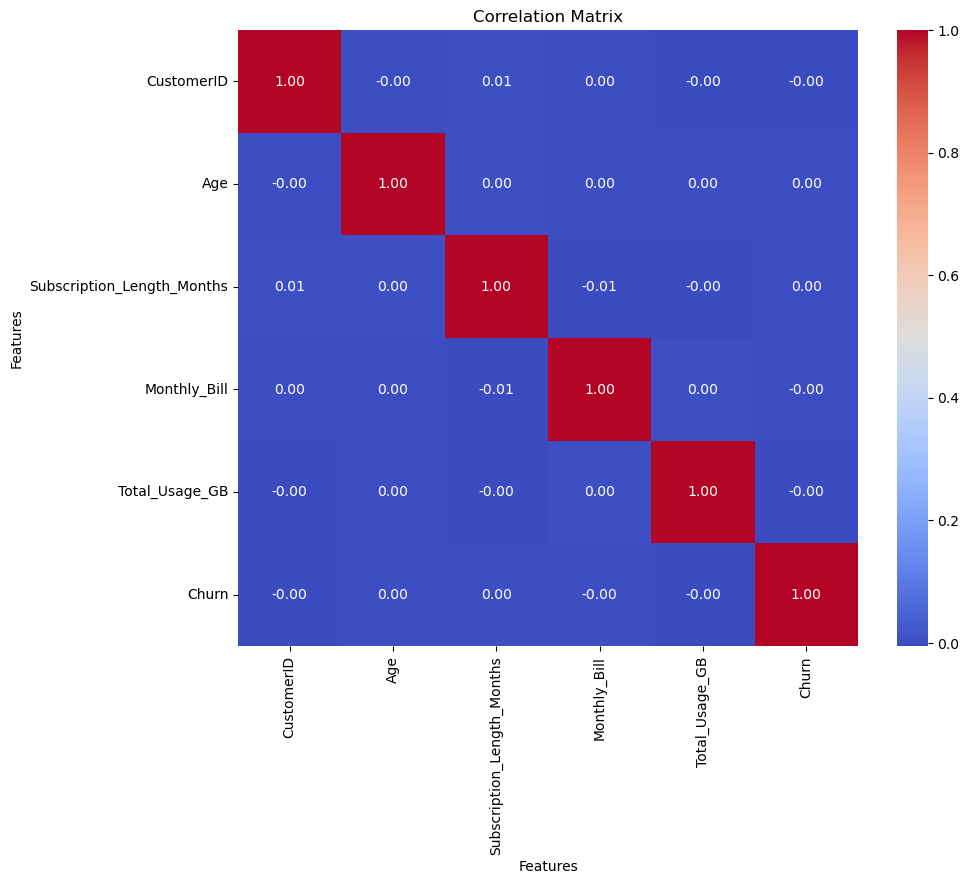

In [6]:
correlation_matrix = dataframe.drop('Unnamed: 0',axis=1).corr()
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add labels and title
plt.title("Correlation Matrix")
plt.xlabel("Features")
plt.ylabel("Features")

# Show the plot
plt.show()

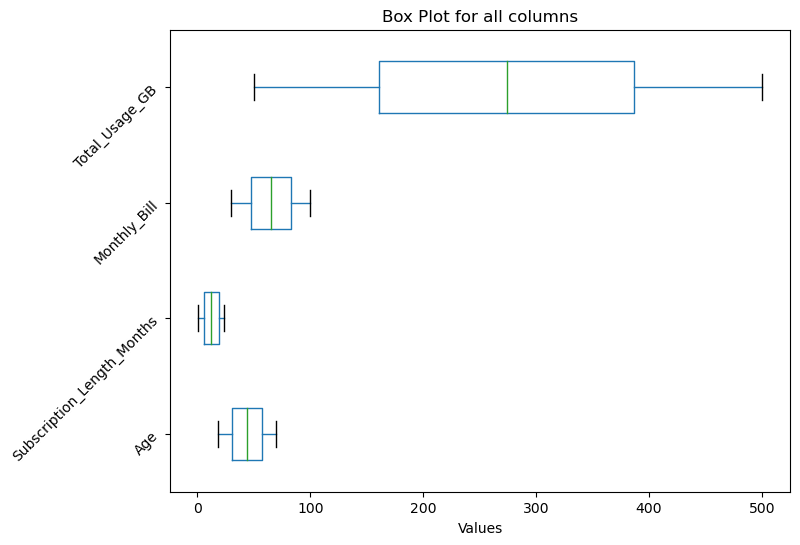

In [7]:
feature_names = ['Age','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB']
plt.figure(figsize=(8, 6))
dataframe[feature_names].boxplot(grid=False,rot=45,vert=False)
plt.title('Box Plot for all columns')
plt.xlabel('Values')
plt.show()

In [8]:
dataframe['Total_bill'] = dataframe['Monthly_Bill']*dataframe['Subscription_Length_Months']

In [9]:
age_bins = [0, 18, 30, 45, 60, float('inf')]  # Define the age bin edges
age_labels = ['0-18', '19-30', '31-45', '46-60', '61+']

dataframe['Age_Group'] = pd.cut(dataframe['Age'], bins=age_bins, labels=age_labels, right=False)


In [10]:
dataframe['Cost_per_GB']=dataframe['Total_bill']/dataframe['Total_Usage_GB']

In [11]:
dataframe['scaled_subscription_length'] = dataframe['Age']/dataframe['Subscription_Length_Months']

In [12]:
dataframe.head(10)

,Unnamed: 0,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_bill,Age_Group,Cost_per_GB,scaled_subscription_length
0,0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,1247.12,61+,5.284407,3.705882
1,1,2,Customer_2,62,Female,New York,1,48.76,172,0,48.76,61+,0.283488,62.000000
2,2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,427.35,19-30,0.929022,4.800000
3,3,4,Customer_4,36,Female,Miami,3,97.94,297,1,293.82,31-45,0.989293,12.000000
4,4,5,Customer_5,46,Female,Miami,19,58.14,266,0,1104.66,46-60,4.152857,2.421053
5,5,6,Customer_6,67,Male,New York,15,82.65,456,1,1239.75,61+,2.718750,4.466667
6,6,7,Customer_7,30,Female,Chicago,3,73.79,269,0,221.37,31-45,0.822937,10.000000
7,7,8,Customer_8,67,Female,Miami,1,97.70,396,1,97.70,61+,0.246717,67.000000
8,8,9,Customer_9,20,Female,Miami,10,42.45,150,1,424.50,19-30,2.830000,2.000000
9,9,10,Customer_10,53,Female,Los Angeles,12,64.49,383,1,773.88,46-60,2.020574,4.416667


In [13]:
feature_names.append('Total_bill')
feature_names.append('Cost_per_GB')
feature_names.append('scaled_subscription_length')

In [14]:
# Scale features using statistics that are robust to outliers.
def robust_scaler(variable):
    var_median = variable.median()
    quartile1 = variable.quantile(0.25)
    quartile3 = variable.quantile(0.75)
    interquantile_range = quartile3 - quartile1
    if int(interquantile_range) == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1
        if int(interquantile_range) == 0:
            quartile1 = variable.quantile(0.01)
            quartile3 = variable.quantile(0.99)
            interquantile_range = quartile3 - quartile1
            z = (variable - var_median) / interquantile_range
            return round(z, 3)

        z = (variable - var_median) / interquantile_range
        return round(z, 3)
    else:
        z = (variable - var_median) / interquantile_range
    return round(z, 3)

In [15]:
for column in feature_names:
    dataframe[column] = robust_scaler(dataframe[column])

In [16]:
# scaler = MinMaxScaler()
# dataframe[feature_names] = scaler.fit_transform(dataframe[feature_names])

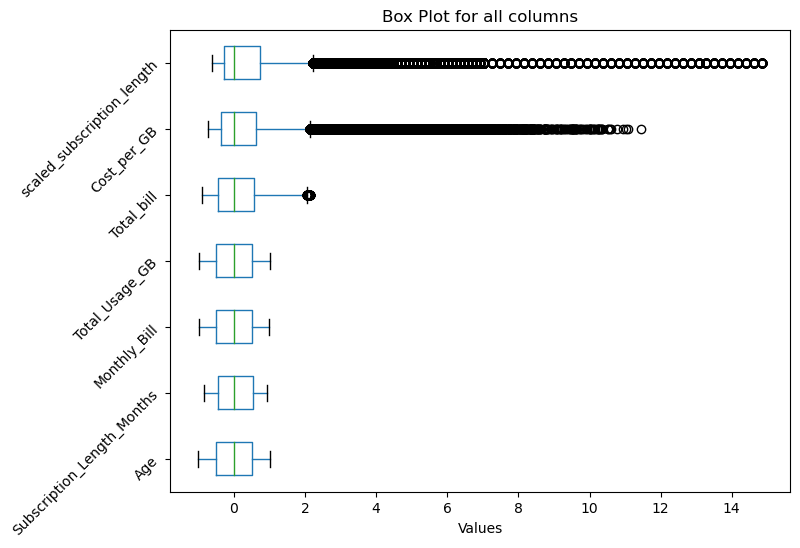

In [17]:
plt.figure(figsize=(8, 6))
dataframe[feature_names].boxplot(grid=False,rot=45,vert=False)
plt.title('Box Plot for all columns')
plt.xlabel('Values')
plt.show()

In [18]:
dataframe.head()

,Unnamed: 0,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_bill,Age_Group,Cost_per_GB,scaled_subscription_length
0,0,1,Customer_1,0.731,Male,Los Angeles,0.385,0.238,-0.168,0,0.665,61+,0.665,0.046
1,1,2,Customer_2,0.692,Female,New York,-0.846,-0.463,-0.451,0,-0.865,61+,-0.665,13.066
2,2,3,Customer_3,-0.769,Female,Los Angeles,-0.538,0.583,0.823,0,-0.382,19-30,-0.493,0.290
3,3,4,Customer_4,-0.308,Female,Miami,-0.692,0.938,0.102,1,-0.552,31-45,-0.477,1.898
4,4,5,Customer_5,0.077,Female,Miami,0.538,-0.196,-0.035,0,0.483,46-60,0.364,-0.241


In [19]:
value_counts = pd.DataFrame(dataframe.Location.value_counts())

In [20]:
value_counts['Location'][1]

20041

In [21]:
x = list(value_counts.index)
y = [value_counts['Location'][i] for i in range(len(x))]

print(min(y),max(y))

19813 20157


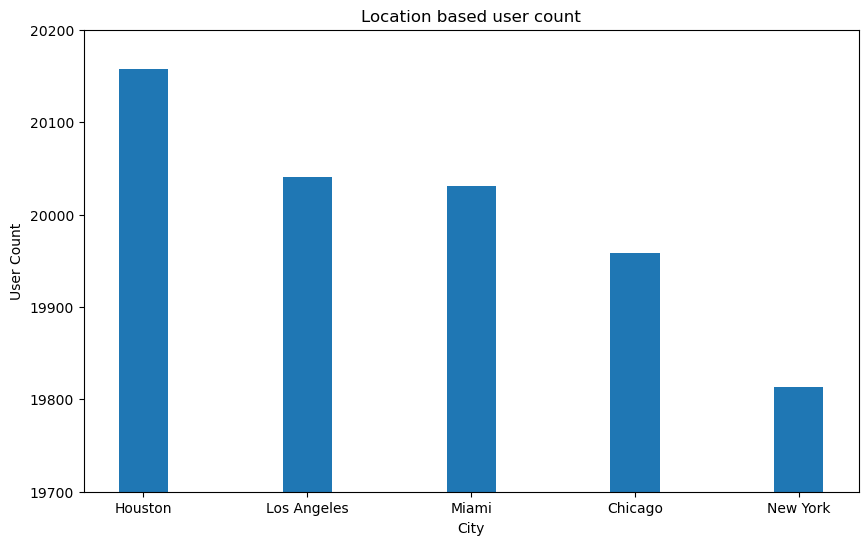

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(x,y,width=0.3)
plt.ylim(19700,20200)
plt.xlabel("City")
plt.ylabel("User Count")
plt.title("Location based user count")
plt.show()

In [23]:
dataframe = pd.get_dummies(dataframe, columns=['Gender', 'Location','Age_Group'],prefix='',prefix_sep='')

In [24]:
dataframe.head()

,Unnamed: 0,CustomerID,Name,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_bill,Cost_per_GB,...,Chicago,Houston,Los Angeles,Miami,New York,0-18,19-30,31-45,46-60,61+
0,0,1,Customer_1,0.731,0.385,0.238,-0.168,0,0.665,0.665,...,0,0,1,0,0,0,0,0,0,1
1,1,2,Customer_2,0.692,-0.846,-0.463,-0.451,0,-0.865,-0.665,...,0,0,0,0,1,0,0,0,0,1
2,2,3,Customer_3,-0.769,-0.538,0.583,0.823,0,-0.382,-0.493,...,0,0,1,0,0,0,1,0,0,0
3,3,4,Customer_4,-0.308,-0.692,0.938,0.102,1,-0.552,-0.477,...,0,0,0,1,0,0,0,1,0,0
4,4,5,Customer_5,0.077,0.538,-0.196,-0.035,0,0.483,0.364,...,0,0,0,1,0,0,0,0,1,0


In [25]:
print(dataframe.columns)

Index(['Unnamed: 0', 'CustomerID', 'Name', 'Age', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn', 'Total_bill', 'Cost_per_GB',
       'scaled_subscription_length', 'Female', 'Male', 'Chicago', 'Houston',
       'Los Angeles', 'Miami', 'New York', '0-18', '19-30', '31-45', '46-60',
       '61+'],
      dtype='object')


In [26]:
def outlier_thresholds(dataframe, variable, low_quantile=0.05, up_quantile=0.95):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

# Are there any outliers in the variables
def has_outliers(dataframe, numeric_columns, plot=False):
   # variable_names = []
    for col in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    #return variable_names

for var in feature_names:
    print(var, "has " , has_outliers(dataframe, [var]),  "Outliers")

Age has  None Outliers
Subscription_Length_Months has  None Outliers
Monthly_Bill has  None Outliers
Total_Usage_GB has  None Outliers
Total_bill has  None Outliers
Cost_per_GB has  None Outliers
scaled_subscription_length has  None Outliers


In [27]:
def crop_outliers(dataframe, variable, low_quantile=0.05, up_quantile=0.95):
    # Calculate the IQR and thresholds
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    
    # Crop outliers by creating a new DataFrame without them
    cleaned_dataframe = dataframe[(dataframe[variable] >= low_limit) & (dataframe[variable] <= up_limit)]
    
    return cleaned_dataframe

In [28]:
for column in feature_names:
    dataframe = crop_outliers(dataframe,column)

In [29]:
for var in feature_names:
    print(var, ':', has_outliers(dataframe, [var]))

Age : None
Subscription_Length_Months : None
Monthly_Bill : None
Total_Usage_GB : None
Total_bill : None
Cost_per_GB : None
scaled_subscription_length : None


C:\Users\tejas\AppData\Local\Temp\ipykernel_22312\3304811786.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataframe.drop('Unnamed: 0',axis=1).corr()


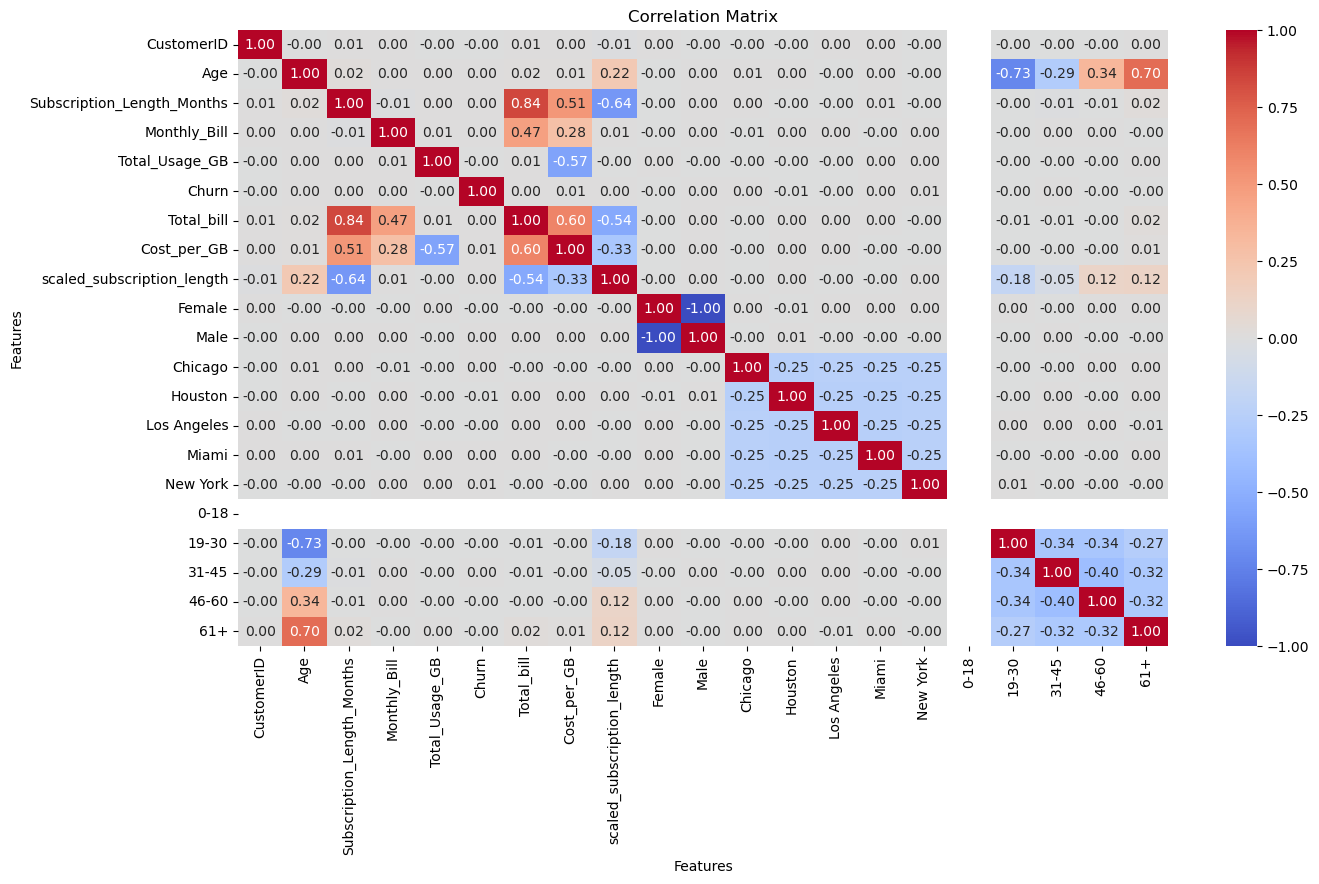

In [30]:
correlation_matrix = dataframe.drop('Unnamed: 0',axis=1).corr()
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add labels and title
plt.title("Correlation Matrix")
plt.xlabel("Features")
plt.ylabel("Features")

# Show the plot
plt.show()

In [32]:
dataframe.columns

Index(['Unnamed: 0', 'CustomerID', 'Name', 'Age', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn', 'Total_bill', 'Cost_per_GB',
       'scaled_subscription_length', 'Female', 'Male', 'Chicago', 'Houston',
       'Los Angeles', 'Miami', 'New York', '0-18', '19-30', '31-45', '46-60',
       '61+'],
      dtype='object')

In [35]:
x = dataframe.drop(['Churn','CustomerID','Name','Age','Unnamed: 0'],axis=1)
y = dataframe['Churn']

In [34]:
x.columns

Index(['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Total_bill', 'Cost_per_GB', 'scaled_subscription_length', 'Female',
       'Male', 'Chicago', 'Houston', 'Los Angeles', 'Miami', 'New York',
       '0-18', '19-30', '31-45', '46-60', '61+'],
      dtype='object')

In [139]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=True,random_state=909)

In [33]:
# n_splits = 1
# sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.3, random_state=42)

In [34]:
# for train_index, test_index in sss.split(x, y):
#     x_train, x_test = x.iloc[train_index], x.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [35]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(69514, 18)
(29792, 18)
(69514,)
(29792,)


In [136]:
dt_model = DecisionTreeClassifier()

In [137]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [140]:
y_pred = dt_model.predict(x_test)

In [141]:
print(f"Model Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 0.8323711063372717
Precision: 0.8320950965824666
Recall: 0.8308605341246291
F1 Score: 0.8314773570898293
Confusion Matrix:
[[12478  2486]
 [ 2508 12320]]


In [66]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}


In [67]:
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

In [68]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [71]:
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(x_test, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8008525778732546


In [74]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [76]:
y_pred = rf_model.predict(x_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 0.8327403329752954
Precision: 0.8341845420497106
Recall: 0.8278145695364238
F1 Score: 0.8309873486415902
Confusion Matrix:
[[12559  2435]
 [ 2548 12250]]


In [77]:
import torch
import torch.nn as nn
from tqdm import tqdm_notebook as tqdm

In [78]:
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

In [79]:
print(device)

cuda


In [104]:
x_train = x_train.iloc[:,:].values
y_train = y_train.iloc[:].values
x_test = x_test.iloc[:,:].values
y_test = y_test.iloc[:].values

In [96]:
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)


In [105]:
X_train_tensor = torch.tensor(x_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(x_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

In [98]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(x_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))  # Sigmoid activation for binary classification
        return x

In [99]:
ann_model = Net()

In [100]:
criterion = nn.BCEWithLogitsLoss()  
optimizer = torch.optim.Adam(ann_model.parameters(), lr=0.001)

In [101]:
ann_model = ann_model.to(device)

In [102]:
# Training loop
num_epochs = 3000
for epoch in tqdm(range(num_epochs)):
    optimizer.zero_grad()  # Zero the gradients
    outputs = ann_model(X_train_tensor)  # Forward pass
    loss = criterion(outputs, y_train_tensor.view(-1, 1))  # Calculate the loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights



C:\Users\tejas\AppData\Local\Temp\ipykernel_22312\1838952312.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm(range(num_epochs)):


  0%|          | 0/3000 [00:00<?, ?it/s]

In [106]:
# Evaluation after all epochs
ann_model.eval()
with torch.no_grad():
    y_pred = ann_model(X_test_tensor)
    y_pred_binary = (y_pred >= 0.5).float()

    # Calculate evaluation metrics
    precision = precision_score(y_test_tensor.cpu().numpy(), y_pred_binary.cpu().numpy())
    recall = recall_score(y_test_tensor.cpu().numpy(), y_pred_binary.cpu().numpy())
    f1 = f1_score(y_test_tensor.cpu().numpy(), y_pred_binary.cpu().numpy())
    cm = confusion_matrix(y_test_tensor.cpu().numpy(), y_pred_binary.cpu().numpy())

    # Print or log the evaluation metrics
    print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}')
    print('Confusion Matrix:')
    print(cm)

Precision: 0.7274, Recall: 0.0380, F1-Score: 0.0723
Confusion Matrix:
[[14783   211]
 [14235   563]]


In [107]:
knn_model = KNeighborsClassifier(n_neighbors=10)

In [59]:
# x = dataframe.drop(['Churn','CustomerID','Name','Age','Unnamed: 0'],axis=1)
# y = dataframe['Churn']
# n_splits = 1
# sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.3, random_state=42)
# for train_index, test_index in sss.split(x, y):
#     x_train, x_test = x.iloc[train_index], x.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [109]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [111]:
print(knn_model.score(x_test,y_test))

0.5796522556390977


In [112]:
import pickle

In [113]:
with open('decision_tree.pth', 'wb') as file:
    pickle.dump(dt_model,file)